# Exploration of web_pages.en

The file has been filtered based on dates: it's only from January-June 2020

# Libraries to load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

## Let's start the pivot tables (rather group_by)

### Loading of web_pages.csv as dataframe

In [2]:
# We first define dtype_dict ie the types of column but crawl_date as we will parse this column
dtype_dict={'domain': str, 'url': str, 'mime_type_web_server': str, 'mime_type_tika': str, 'content':str,'language':str}
# We load the csv as a dataframe. Remove (or add) the nrows=100000 if you want to load the whole dataframe or just a part.
web_pages =  pd.read_csv('data/web-pages.csv', usecols=['crawl_date','domain','url','content','language'], dtype=dtype_dict, parse_dates=['crawl_date']) #uncomment this line and comment the next one if you would prefer to play with the first x rows to spare memory and time.
# I now create a new column based on crawl_date BUT with only the day (no time) because we do need sometimes only the day
web_pages['date'] = web_pages['crawl_date'].dt.date
web_pages.sort_values(by='crawl_date')

,crawl_date,domain,url,language,content,date
1978144,2020-02-21 18:46:18+00:00,sapo.ao,http://tpa.sapo.ao/noticias/internacional/bras...,pt,Brasil registra 16 casos suspeitos de coronavi...,2020-02-21
1977816,2020-02-21 18:46:19+00:00,sapo.ao,http://jornaldosdesportos.sapo.ao/26/0/coronav...,pt,Jornal dos Desportos - CoronavÃ­rus forÃ§a adi...,2020-02-21
1978365,2020-02-21 18:46:21+00:00,cpplus.jp,http://www.cpplus.jp/,en,CP+2020 カメラと写真映像のワールドプレミアショー「CP+（シーピープラス）」 カメラ...,2020-02-21
1978416,2020-02-21 18:46:21+00:00,jm-madeira.pt,https://www.jm-madeira.pt/,pt,JM Madeira JM Madeira Edição Impressa Multiméd...,2020-02-21
1977821,2020-02-21 18:46:21+00:00,sapo.ao,http://m.jornaldeeconomia.sapo.ao/financas/o-c...,pt,Jornal de Economia e Finanças Voltar ao topo V...,2020-02-21
...,...,...,...,...,...,...
1917591,2020-06-30 19:23:57+00:00,usp.br,https://repositoriodatasharingfapesp.uspdigita...,en,Search DSpace Repository Search DSpace Home → ...,2020-06-30
1923423,2020-06-30 19:24:05+00:00,inactievoorerasmusmc.nl,https://corona.inactievoorerasmusmc.nl/deelnem...,en,Corona Login Choose your language Nederlands F...,2020-06-30
1923424,2020-06-30 19:24:08+00:00,inactievoorerasmusmc.nl,https://corona.inactievoorerasmusmc.nl/deelnem...,nl,Corona Inloggen Kies jouw taal English Zoeken....,2020-06-30
1917592,2020-06-30 19:24:45+00:00,usp.br,https://repositoriodatasharingfapesp.uspdigita...,en,Search DSpace Repository Search DSpace Home → ...,2020-06-30


## Count number of harvesting by day

In [3]:
#pd.pivot_table(web_pages,values='language',index=['crawl_date','domain'], columns='crawl_date')
web_pages_count_byCrawlDate = web_pages.groupby(['date']).size()


date
2020-02-21    23903
2020-02-22    69697
2020-02-23    56542
2020-02-24    29605
2020-02-25    30498
              ...  
2020-06-26     5465
2020-06-27     3697
2020-06-28     4198
2020-06-29     4125
2020-06-30     3608
Length: 124, dtype: int64

Text(0, 0.5, 'Count')

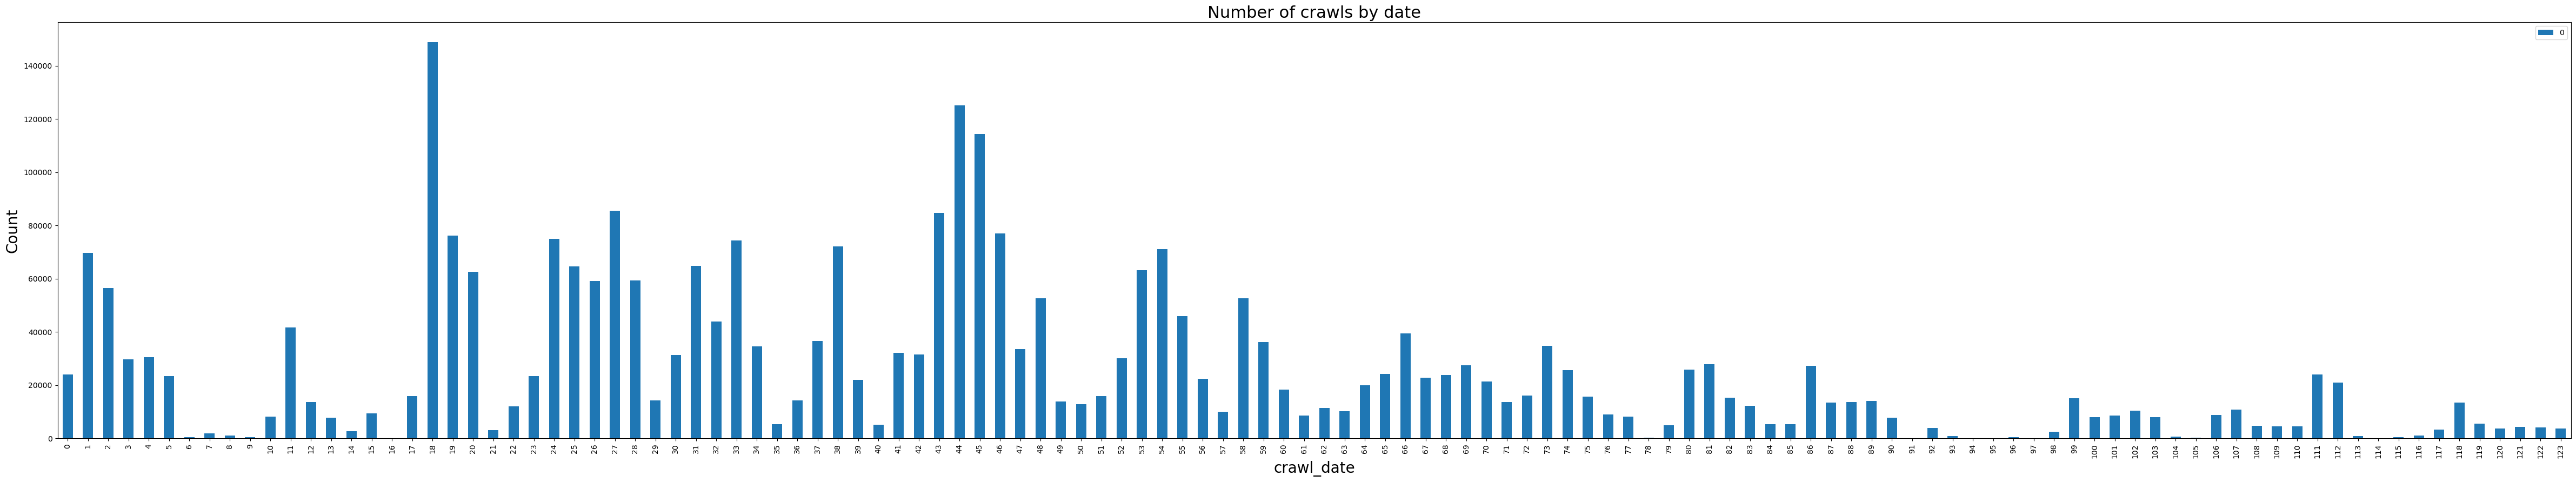

In [4]:
web_pages_count_byCrawlDate = pd.read_csv('generated/web_pages_count_byDate.csv')
#plt.plot('0','crawl_date')
web_pages_count_byCrawlDate_chart = web_pages_count_byCrawlDate.plot.bar(figsize=(60, 10))

web_pages_count_byCrawlDate_chart.set_title("Number of crawls by date", fontsize=22)
web_pages_count_byCrawlDate_chart.set_xlabel("crawl_date", fontsize=20)
web_pages_count_byCrawlDate_chart.set_ylabel("Count", fontsize=20)

#initial code for this graph by Nick Ruest

## Domain frequency

In [5]:
web_pages_count_byDomain = web_pages.groupby(['domain']).size()
web_pages_count_byDomain = web_pages_count_byDomain.sort_values(ascending=False)
#web_pages_count_byDomain = web_pages_count_byDomain.rename(columns={"domain":"domain", "date":"date", "0":"frequency"})
web_pages_count_byDomain.to_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain

domain
europa.eu                  43757
yahoo.com                  38498
mainichi.jp                33497
wikipedia.org              29145
wordpress.org              23113
                           ...  
lexus.com.bn                   1
cantonhealth.org               1
rightsofolderpeople.org        1
cantoni.com                    1
lansingmutualaid.org           1
Length: 87276, dtype: int64

In [6]:
web_pages_count_byDomain = pd.read_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain = web_pages_count_byDomain.rename(columns={"domain":"domain", "date":"date", "0":"frequency"})
web_pages_count_byDomain

,domain,frequency
0,europa.eu,43757
1,yahoo.com,38498
2,mainichi.jp,33497
3,wikipedia.org,29145
4,wordpress.org,23113
...,...,...
87271,lexus.com.bn,1
87272,cantonhealth.org,1
87273,rightsofolderpeople.org,1
87274,cantoni.com,1


Text(0, 0.5, 'Count')

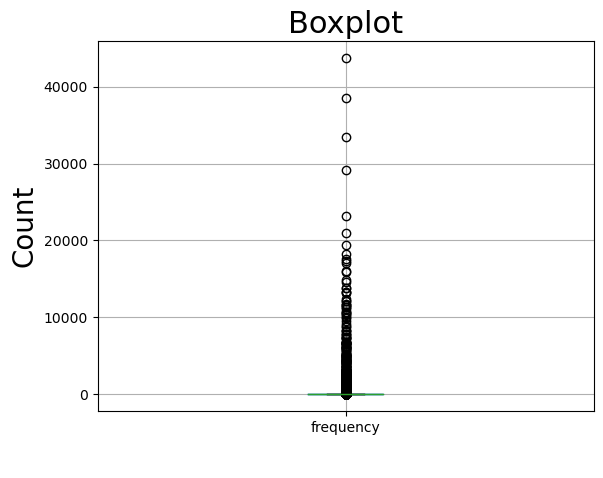

In [7]:
#the standard box plot

web_pages_count_byDomain_boxplot = web_pages_count_byDomain.boxplot()
web_pages_count_byDomain_boxplot.set_title("Boxplot", fontsize=22)
web_pages_count_byDomain_boxplot.set_xlabel(" ", fontsize=20)
web_pages_count_byDomain_boxplot.set_ylabel("Count", fontsize=20)

Text(0, 0.5, 'Count')

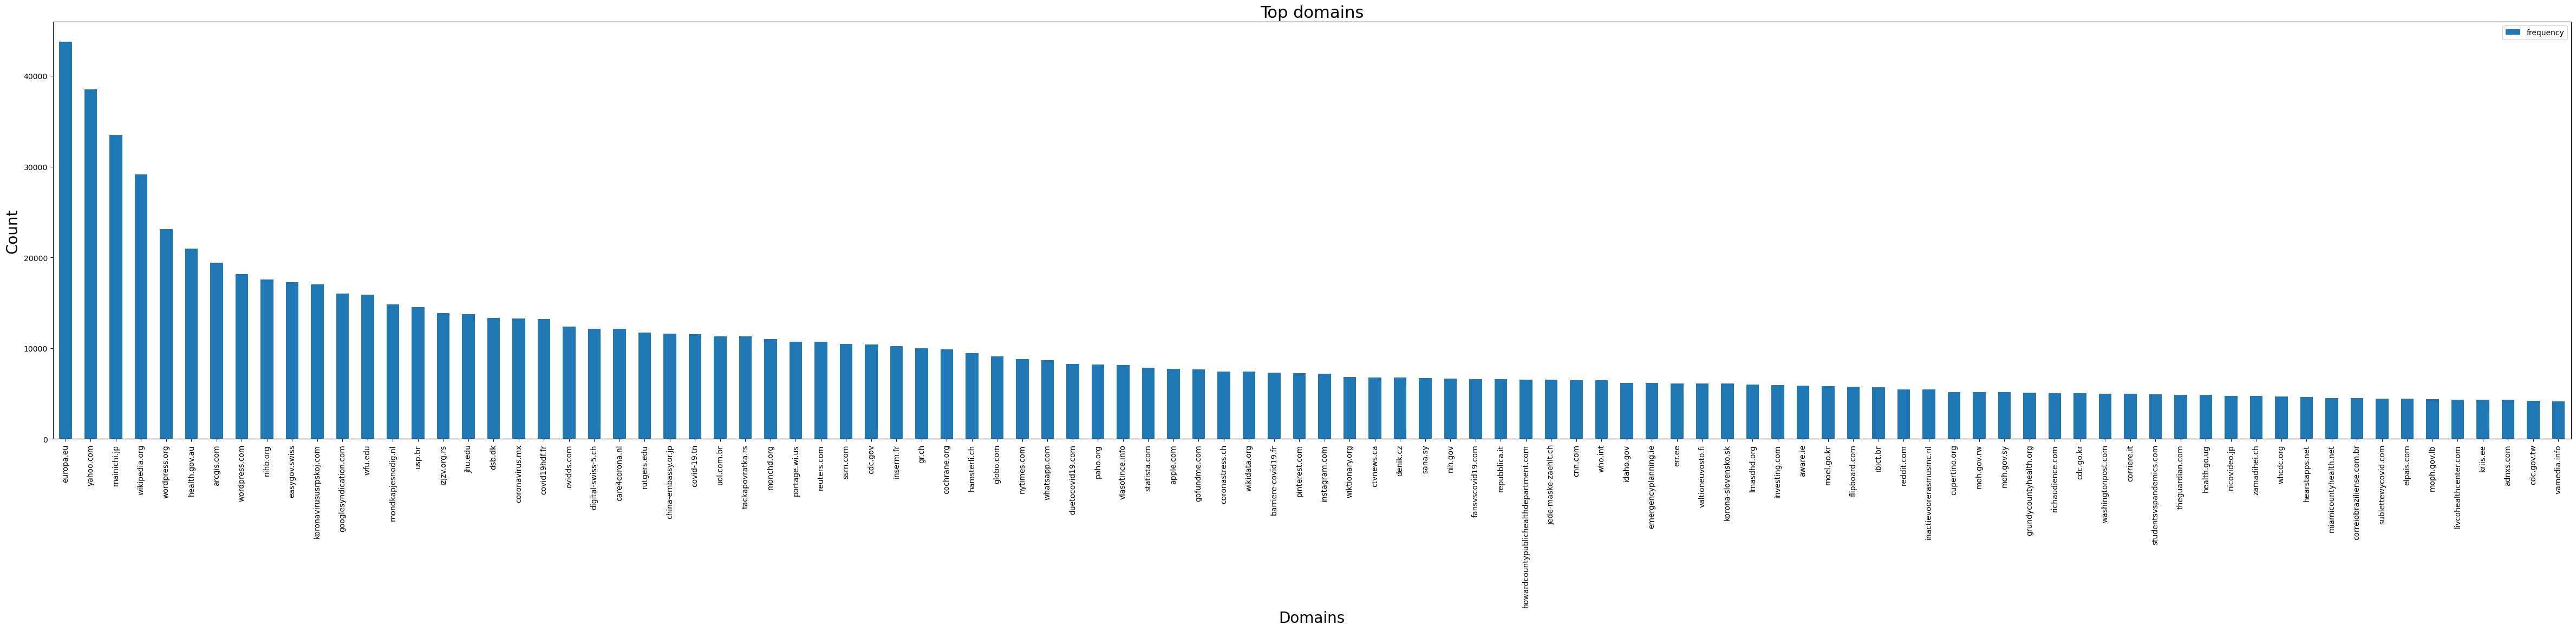

In [8]:
#web_pages_count_byDomain = pd.read_csv('generated/web_pages_count_byDomain.csv')
topDomain = web_pages_count_byDomain.sort_values("frequency", ascending=False).head(100)

topDomain_chart = topDomain.plot.bar(figsize=(60, 10), x="domain")

topDomain_chart.set_title("Top domains", fontsize=22)
topDomain_chart.set_xlabel("Domains", fontsize=20)
topDomain_chart.set_ylabel("Count", fontsize=20)

## Crawl by language (by date)

### Let's look at the most popular languages

In [9]:
#pd.pivot_table(web_pages,values='language',index=['domain'], columns='crawl_date')
web_pages_byLanguage = web_pages.groupby(['language']).size()
web_pages_byLanguage.to_csv('generated/web_pages_byLanguage.csv')
web_pages_byLanguage = pd.read_csv('generated/web_pages_byLanguage.csv')
web_pages_byLanguage = web_pages_byLanguage.rename(columns={'language':'language','0':'frequency'}).sort_values("frequency", ascending=False)
web_pages_byLanguage

,language,frequency
14,en,1693556
20,fr,142956
15,es,133176
12,de,115240
49,pt,71024
...,...,...
47,pa,181
4,be,161
33,km,146
43,ne,128


In [10]:
#affichons les 10 valeurs les plus importantes
web_pages_byLanguage.nlargest(10, 'frequency')

,language,frequency
14,en,1693556
20,fr,142956
15,es,133176
12,de,115240
49,pt,71024
31,it,64636
44,nl,58406
26,hr,56802
9,cs,33289
2,ar,23866


In [11]:
## Altair has a default limit of 5000 rows, and this DataFrame is ~11000 rows, so we're going to disable the max allowed rows.
alt.data_transformers.disable_max_rows()

crawl_chart = (
    alt.Chart(web_pages_byLanguage.nlargest(10, 'frequency'))
    .mark_bar()
    .encode(
        x="language:O",
        y="frequency:Q",
#        color="frequency",
        tooltip="language",
        order=alt.Order("frequency", sort="descending"),
    )
)

crawl_chart.properties(width=1400, height=700, title="Crawl frequency by language")

alt.Chart(...)

In [12]:
#pd.pivot_table(web_pages,values='language',index=['domain'], columns='crawl_date')
web_pages_byCrawlDate_byLanguage = web_pages.groupby(['language','date']).size()
web_pages_byCrawlDate_byLanguage.to_csv('generated/web_pages_byCrawlDate_byLanguage.csv')
web_pages_byCrawlDate_byLanguage

language  date      
af        2020-02-21     83
          2020-02-22    112
          2020-02-23     10
          2020-02-24     22
          2020-02-26      2
                       ... 
zh-TW     2020-05-23     12
          2020-06-16      3
          2020-06-17     10
          2020-06-18      6
          2020-06-24      2
Length: 4659, dtype: int64

In [13]:
web_pages_byCrawlDate_byLanguage = pd.read_csv('generated/web_pages_byCrawlDate_byLanguage.csv')
web_pages_byCrawlDate_byLanguage

,language,date,0
0,af,2020-02-21,83
1,af,2020-02-22,112
2,af,2020-02-23,10
3,af,2020-02-24,22
4,af,2020-02-26,2
...,...,...,...
4654,zh-TW,2020-05-23,12
4655,zh-TW,2020-06-16,3
4656,zh-TW,2020-06-17,10
4657,zh-TW,2020-06-18,6


In [14]:
## Altair has a default limit of 5000 rows, and this DataFrame is ~11000 rows, so we're going to disable the max allowed rows.
alt.data_transformers.disable_max_rows()

crawl_chart = (
    alt.Chart(web_pages_byCrawlDate_byLanguage)
    .mark_bar()
    .encode(
        x="date:O",
        y="0:Q",
        color="language",
        tooltip="language",
        order=alt.Order("language", sort="descending"),
    )
)

crawl_chart.properties(width=1400, height=700, title="Crawl frequency by language")

alt.Chart(...)

In [15]:
# Another example of altair chart, in the form of a flowchart
alt.data_transformers.disable_max_rows()

selection = alt.selection_multi(fields=['language'], bind='legend')

crawl_stream = (
    alt.Chart(web_pages_byCrawlDate_byLanguage)
        .mark_bar()
        .encode(
            alt.Tooltip("language"),
            alt.X('date:O',
                axis=alt.Axis(domain=False, tickSize=0)
            ),
            alt.Y('0:Q', stack='center', axis=None),
            alt.Color('language:N',
                scale=alt.Scale(scheme='category20b'),
            ),
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).interactive().add_selection(
            selection
        )
)

crawl_stream.properties(width=900, height=500, title="Crawl frequency by language")

alt.Chart(...)

In [16]:
#And now the same, but we filter first on the 10 most used languages: en, fr, es, de, pt, it, nl, hr, cs, ar

lang_codes=['en', 'fr', 'es', 'de', 'pt', 'it', 'nl', 'hr', 'cs', 'ar']
filtered_web_pages_byCrawlDate_byLanguage = web_pages_byCrawlDate_byLanguage[web_pages_byCrawlDate_byLanguage['language'].isin(lang_codes)]
filtered_web_pages_byCrawlDate_byLanguage

,language,date,0
145,ar,2020-02-21,11
146,ar,2020-02-22,43
147,ar,2020-02-23,16
148,ar,2020-02-24,31
149,ar,2020-02-25,65
...,...,...,...
3407,pt,2020-06-18,70
3408,pt,2020-06-20,1
3409,pt,2020-06-24,401
3410,pt,2020-06-25,1582


In [17]:
# Another example of altair chart, in the form of a flowchart
alt.data_transformers.disable_max_rows()

selection = alt.selection_multi(fields=['language'], bind='legend')

crawl_stream = (
    alt.Chart(filtered_web_pages_byCrawlDate_byLanguage)
        .mark_bar()
        .encode(
            alt.Tooltip("language"),
            alt.X('date:O',
                axis=alt.Axis(domain=False, tickSize=0)
            ),
            alt.Y('0:Q', stack='center', axis=None),
            alt.Color('language:N',
                scale=alt.Scale(scheme='category20b'),
            ),
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).interactive().add_selection(
            selection
        )
)

crawl_stream.properties(width=900, height=500, title="Crawl frequency by language")

alt.Chart(...)

## And now, let's see only the english corpus

In [18]:
# We first define dtype_dict ie the types of column but crawl_date as we will parse this column
dtype_dict={'domain': str, 'url': str, 'mime_type_web_server': str, 'mime_type_tika': str, 'content':str,'language':str}
# We load the csv as a dataframe. Remove (or add) the nrows=100000 if you want to load the whole dataframe or just a part.
web_pages =  pd.read_csv('data/web-pages.csv', usecols=['crawl_date','domain','url','content','language'], dtype=dtype_dict, parse_dates=['crawl_date']) #uncomment this line and comment the next one if you would prefer to play with the first x rows to spare memory and time.
# I now create a new column based on crawl_date BUT with only the day (no time) because we do need sometimes only the day
web_pages['date'] = web_pages['crawl_date'].dt.date
# and now we keep only pages with langue = en
web_pages_en = web_pages.loc[web_pages['language'] == 'en']
web_pages_en.sort_values(by='crawl_date')

,crawl_date,domain,url,language,content,date
1978365,2020-02-21 18:46:21+00:00,cpplus.jp,http://www.cpplus.jp/,en,CP+2020 カメラと写真映像のワールドプレミアショー「CP+（シーピープラス）」 カメラ...,2020-02-21
1977780,2020-02-21 18:46:30+00:00,china-embassy.org,http://dk.china-embassy.org/eng/zdgx/t1736581.htm,en,Statement by Spokesperson of the Chinese Embas...,2020-02-21
1978368,2020-02-21 18:46:49+00:00,cpplus.jp,http://www.cpplus.jp/ch/,en,CP+2020 相机及影像的世界首演展览会 相机及影像的世界首演展览会 常见问题解答 一般观...,2020-02-21
1987190,2020-02-21 18:47:23+00:00,mothership.sg,https://mothership.sg/2020/01/denmark-china-co...,en,﻿ China demands apology over coronavirus flag ...,2020-02-21
1987191,2020-02-21 18:47:52+00:00,mothership.sg,https://mothership.sg/2020/01/denmark-china-co...,en,﻿ China demands apology over coronavirus flag ...,2020-02-21
...,...,...,...,...,...,...
1917590,2020-06-30 19:23:55+00:00,usp.br,https://repositoriodatasharingfapesp.uspdigita...,en,Search DSpace Repository Search DSpace Home → ...,2020-06-30
1917591,2020-06-30 19:23:57+00:00,usp.br,https://repositoriodatasharingfapesp.uspdigita...,en,Search DSpace Repository Search DSpace Home → ...,2020-06-30
1923423,2020-06-30 19:24:05+00:00,inactievoorerasmusmc.nl,https://corona.inactievoorerasmusmc.nl/deelnem...,en,Corona Login Choose your language Nederlands F...,2020-06-30
1917592,2020-06-30 19:24:45+00:00,usp.br,https://repositoriodatasharingfapesp.uspdigita...,en,Search DSpace Repository Search DSpace Home → ...,2020-06-30


In [20]:
# now, let's deduplicate. Based on three columns:

web_pages_en = web_pages_en.drop_duplicates(subset=['crawl_date', 'content', 'url'])

In [21]:
web_pages_en

,crawl_date,domain,url,language,content,date
0,2020-03-09 19:10:09+00:00,cdc.gov,https://www.cdc.gov/coronavirus/2019-ncov/inde...,en,Coronavirus Disease 2019 (COVID-19) | CDC Skip...,2020-03-09
1,2020-03-09 19:10:53+00:00,cdc.gov,https://www.cdc.gov/coronavirus/2019-ncov/inde...,en,Coronavirus Disease 2019 (COVID-19) | CDC Skip...,2020-03-09
2,2020-03-09 19:11:12+00:00,cdc.gov,https://wwwnc.cdc.gov/travel/page/covid-19-cru...,en,COVID-19 and Cruise Ship Travel | Travelers' ...,2020-03-09
3,2020-03-09 19:16:59+00:00,cdc.gov,https://wwwnc.cdc.gov/travel/,en,Travelers' Health | CDC Skip directly to site ...,2020-03-09
4,2020-03-09 19:18:13+00:00,cdc.gov,https://www.cdc.gov/,en,Centers for Disease Control and Prevention Ski...,2020-03-09
...,...,...,...,...,...,...
3048621,2020-04-21 15:01:11+00:00,gijn.org,https://gijn.org/new-sources-of-media-funding-...,en,New Sources of Media Funding on the COVID-19 P...,2020-04-21
3048622,2020-04-21 15:00:56+00:00,yougov.com,https://today.yougov.com/covid-19,en,COVID-19 Public Monitor | YouGov COVID-19 Late...,2020-04-21
3048623,2020-04-21 14:59:26+00:00,ny.gov,https://data.ny.gov/browse?tags=covid-19,en,Results matching topic of covid-19 | Page 1 of...,2020-04-21
3048633,2020-04-20 22:35:38+00:00,isciii.es,https://analytics.isciii.es/,en,Sign in - Matomo Sign in Username or Email Pas...,2020-04-20


In [22]:
web_pages_en.sort_values(by='crawl_date').to_csv('generated/web_pages_en_deduplicated.csv')

In [ ]:
# and now let's count the versions of each pages
# and add the amount of versions